In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv('Diabetes_Missing_Data.csv')

In [3]:
ds

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [4]:
#Statistical Summary
ds.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Operations 
# Finding Null Values
ds.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

<Figure size 1000x600 with 0 Axes>

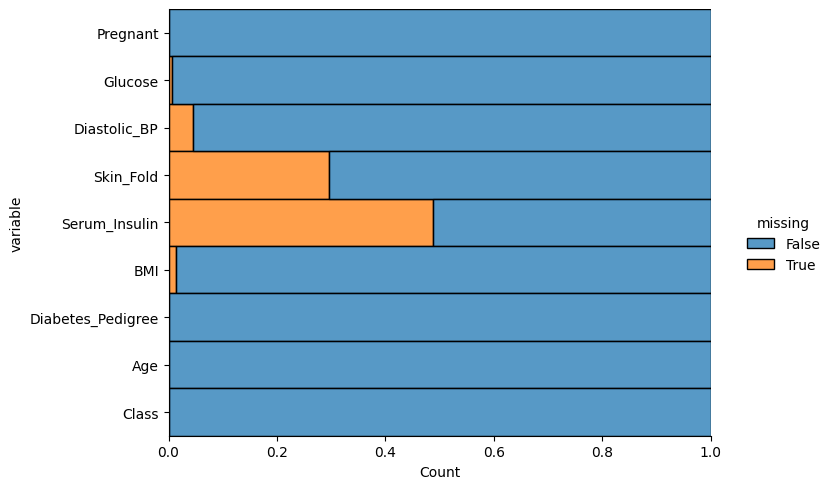

In [6]:
plt.figure(figsize=(10,6))
sns.displot(
    data=ds.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5
)

In [7]:
# Filling the missing values

# Glucose - Repalcing with min value
ds['Glucose']=ds['Glucose'].fillna(ds['Glucose'].min())
# Diastolic_BP - Repalcing with max value
ds['Diastolic_BP']=ds['Diastolic_BP'].fillna(ds['Diastolic_BP'].max())
# Skin_Fold - Repalcing with mean value
ds['Skin_Fold']=ds['Skin_Fold'].fillna(ds['Skin_Fold'].mean())
# Serum_Insulin - Repalcing with median value
ds['Serum_Insulin']=ds['Serum_Insulin'].fillna(ds['Serum_Insulin'].median())
# BMI - Repalcing with standard deviation value
ds['BMI']=ds['BMI'].fillna(ds['BMI'].std())

In [8]:
ds

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,125.0,30.1,0.349,47,1


In [9]:
ds.isnull().sum()

Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64

<Figure size 1000x600 with 0 Axes>

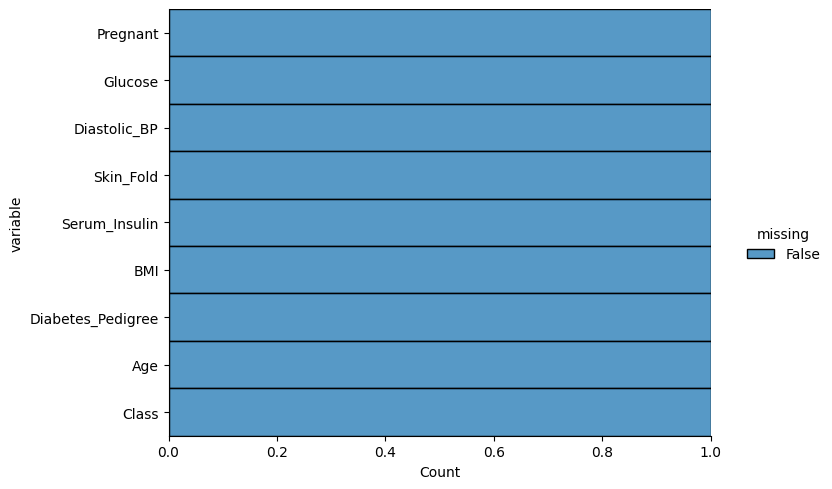

In [10]:
plt.figure(figsize=(10,6))
sns.displot(
    data=ds.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5
)

In [11]:
# Correlation between Pregnant and Glucose
a=ds['Glucose'].to_numpy()
b=ds['Diastolic_BP'].to_numpy()

In [12]:
print(a)
print(type(a))

[148.  85. 183.  89. 137. 116.  78. 115. 197. 125. 110. 168. 139. 189.
 166. 100. 118. 107. 103. 115. 126.  99. 196. 119. 143. 125. 147.  97.
 145. 117. 109. 158.  88.  92. 122. 103. 138. 102.  90. 111. 180. 133.
 106. 171. 159. 180. 146.  71. 103. 105. 103. 101.  88. 176. 150.  73.
 187. 100. 146. 105.  84. 133.  44. 141. 114.  99. 109. 109.  95. 146.
 100. 139. 126. 129.  79.  44.  62.  95. 131. 112. 113.  74.  83. 101.
 137. 110. 106. 100. 136. 107.  80. 123.  81. 134. 142. 144.  92.  71.
  93. 122. 163. 151. 125.  81.  85. 126.  96. 144.  83.  95. 171. 155.
  89.  76. 160. 146. 124.  78.  97.  99. 162. 111. 107. 132. 113.  88.
 120. 118. 117. 105. 173. 122. 170.  84.  96. 125. 100.  93. 129. 105.
 128. 106. 108. 108. 154. 102.  57. 106. 147.  90. 136. 114. 156. 153.
 188. 152.  99. 109.  88. 163. 151. 102. 114. 100. 131. 104. 148. 120.
 110. 111. 102. 134.  87.  79.  75. 179.  85. 129. 143. 130.  87. 119.
  44.  73. 141. 194. 181. 128. 109. 139. 111. 123. 159. 135.  85. 158.
 105. 

In [13]:
print(b)
print(type(b))

[ 72.  66.  64.  66.  40.  74.  50. 122.  70.  96.  92.  74.  80.  60.
  72. 122.  84.  74.  30.  70.  88.  84.  90.  80.  94.  70.  76.  66.
  82.  92.  75.  76.  58.  92.  78.  60.  76.  76.  68.  72.  64.  84.
  92. 110.  64.  66.  56.  70.  66. 122.  80.  50.  66.  90.  66.  50.
  68.  88.  82.  64. 122.  72.  62.  58.  66.  74.  88.  92.  66.  85.
  66.  64.  90.  86.  75.  48.  78.  72. 122.  66.  44. 122.  78.  65.
 108.  74.  72.  68.  70.  68.  55.  80.  78.  72.  82.  72.  62.  48.
  50.  90.  72.  60.  96.  72.  65.  56. 122.  58.  58.  85.  72.  62.
  76.  62.  54.  92.  74.  48.  60.  76.  76.  64.  74.  80.  76.  30.
  70.  58.  88.  84.  70.  56.  64.  74.  68.  60.  70.  60.  80.  72.
  78.  82.  52.  66.  62.  75.  80.  64.  78.  70.  74.  65.  86.  82.
  78.  88.  52.  56.  74.  72.  90.  74.  80.  64.  88.  74.  66.  68.
  66.  90.  82.  70. 122.  60.  64.  72.  78. 110.  78.  82.  80.  64.
  74.  60.  74.  68.  68.  98.  76.  80.  62.  70.  66. 122.  55.  84.
  58. 

In [14]:
x=np.corrcoef(a,b)
print(x)

[[1.         0.15197748]
 [0.15197748 1.        ]]


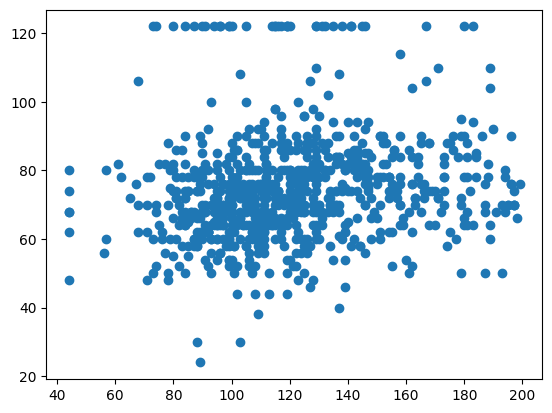

In [15]:
plt.scatter(a,b)
plt.show()

In [16]:
# Correlation between Diastolic_BP and Skin_Fold
a=ds['Skin_Fold'].to_numpy()
b=ds['Serum_Insulin'].to_numpy()

In [17]:
x=np.corrcoef(a,b)
print(x)

[[1.         0.15467816]
 [0.15467816 1.        ]]


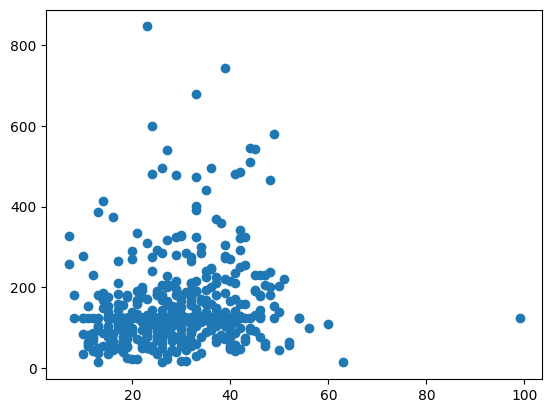

In [18]:
plt.scatter(a,b)
plt.show()

In [19]:
# Correlation between Diastolic_BP and Skin_Fold
a=ds['BMI'].to_numpy()
b=ds['Age'].to_numpy()

In [20]:
x=np.corrcoef(a,b)
print(x)

[[1.         0.03488856]
 [0.03488856 1.        ]]


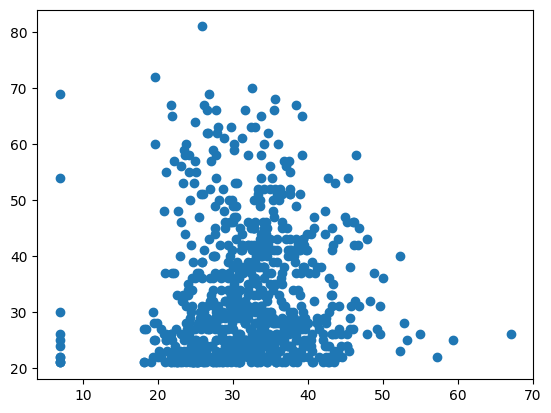

In [21]:
plt.scatter(a,b)
plt.show()

In [22]:
""" Work to do on Lab 0
Check the datatype 1
Renaming the column 1
Droping anty unwanted column or row 0 
Handelling Missing values 1
Statistical Summary 1
Plots 1
Detecting Outliers 0 
Vector Encoding 0

Check the datatype 1
Renaming the column 1
Droping any unwanted column or row 1
Handelling Missing values 1
Plots 1
Statistical Summary 1
Check for Duplicates 1
Removing Special Characters 1
Detecting Outliers 0
Vector Encoding 0
"""

' Work to do on Lab 0\nCheck the datatype 1\nRenaming the column 1\nDroping anty unwanted column or row 0 \nHandelling Missing values 1\nDetecting Outliers 0 \nPlots 0\nVector Encoding 0\nStatistical Summary 1\n\nCheck the datatype 1\nRenaming the column 1\nDroping any unwanted column or row 1\nHandelling Missing values 1\nDetecting Outliers 0\nPlots 0\nVector Encoding 0\nStatistical Summary 1\nCheck for Duplicates 0\nRemoving Special Characters 0\n\n'

In [23]:
# Renaming the column
print(ds.columns)

Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')


In [24]:
ds = ds.rename(columns={ds.columns[4]: 'Insulin'})
print(ds.columns)

Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Insulin', 'BMI',
       'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')


In [25]:
# Dropping any unwanted column or row
print(ds.columns)

Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Insulin', 'BMI',
       'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')


In [26]:
ds=ds.drop('Class',axis=1)
print(ds.columns)

Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Insulin', 'BMI',
       'Diabetes_Pedigree', 'Age'],
      dtype='object')


In [28]:
print(ds.head(5))

   Pregnant  Glucose  Diastolic_BP  Skin_Fold  Insulin   BMI  \
0         6    148.0          72.0   35.00000    125.0  33.6   
1         1     85.0          66.0   29.00000    125.0  26.6   
2         8    183.0          64.0   29.15342    125.0  23.3   
3         1     89.0          66.0   23.00000     94.0  28.1   
4         0    137.0          40.0   35.00000    168.0  43.1   

   Diabetes_Pedigree  Age  
0              0.627   50  
1              0.351   31  
2              0.672   32  
3              0.167   21  
4              2.288   33  


In [29]:
print(ds.tail(5))

     Pregnant  Glucose  Diastolic_BP  Skin_Fold  Insulin   BMI  \
763        10    101.0          76.0   48.00000    180.0  32.9   
764         2    122.0          70.0   27.00000    125.0  36.8   
765         5    121.0          72.0   23.00000    112.0  26.2   
766         1    126.0          60.0   29.15342    125.0  30.1   
767         1     93.0          70.0   31.00000    125.0  30.4   

     Diabetes_Pedigree  Age  
763              0.171   63  
764              0.340   27  
765              0.245   30  
766              0.349   47  
767              0.315   23  


In [32]:
print(ds.dtypes)

Pregnant               int64
Glucose              float64
Diastolic_BP         float64
Skin_Fold            float64
Insulin              float64
BMI                  float64
Diabetes_Pedigree    float64
Age                    int64
dtype: object


In [33]:
ds.count()

Pregnant             768
Glucose              768
Diastolic_BP         768
Skin_Fold            768
Insulin              768
BMI                  768
Diabetes_Pedigree    768
Age                  768
dtype: int64

In [38]:
ds=ds.drop_duplicates()
ds.head(5)

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Insulin,BMI,Diabetes_Pedigree,Age
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33


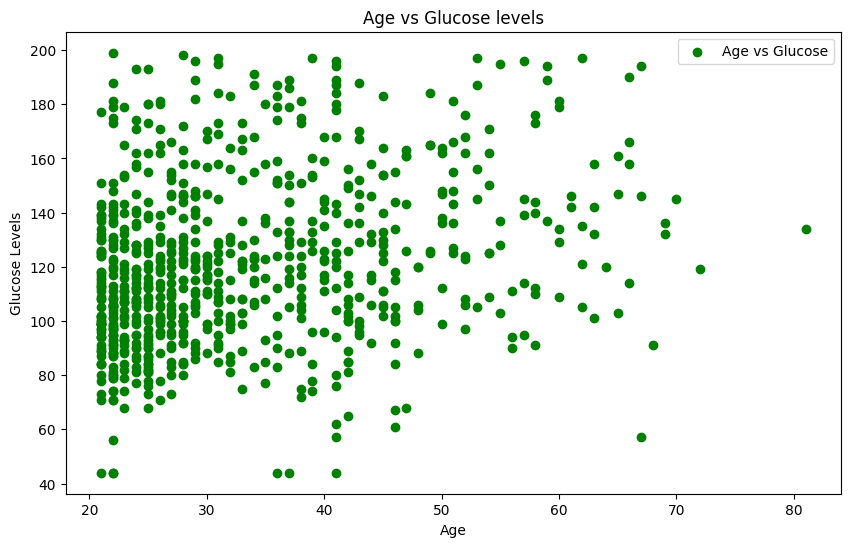

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(ds['Age'],ds['Glucose'],color='Green',label='Age vs Glucose')
plt.title('Age vs Glucose levels')
plt.xlabel('Age')
plt.ylabel('Glucose Levels')
plt.legend()
plt.show()

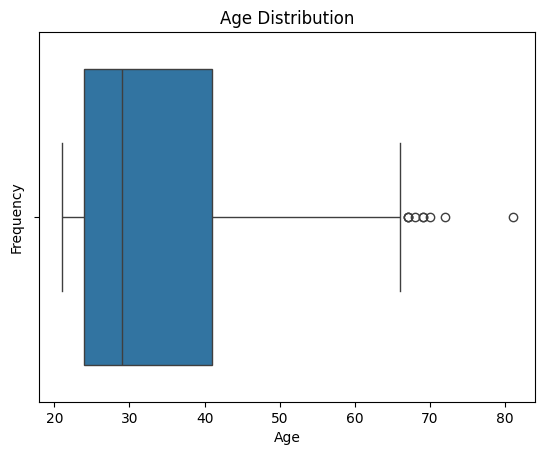

In [42]:
sns.boxplot(x=ds['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()